In [1]:
import pandas as pd
import tensorflow as tf
import keras as k
import sklearn
from xgboost.sklearn import XGBRegressor as xgbr
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法
from sklearn.svm import SVR  # SVM中的回归算法
from sklearn.model_selection import cross_val_score  # 交叉检验
import pandas as pd  # 导入pandas
import matplotlib.pyplot as plt  # 导入图形展示库
import matplotlib.pyplot as pyplot
from sklearn.neighbors import KNeighborsRegressor as knr
from sklearn.preprocessing import StandardScaler

In [3]:
file =pd.read_csv("./PRSA_data_2010.1.1-2014.12.31.csv")

In [4]:
test=file[35064:] #2014年的数据
train=file[:35064] #2014年以前的数据
train=train.dropna()
test=test.dropna()
train=pd.get_dummies(train)
test=pd.get_dummies(test)

train = train.astype(float)
test = test.astype(float)



ytrain=train[["pm2.5"]]
xtrain=train[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv']]
ytest=test[["pm2.5"]]
xtest=test[['year', 'month','day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv']]


# 创建StandardScaler对象
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# 对训练集进行标准化
xtrain = x_scaler.fit_transform(xtrain)

# 使用相同的缩放参数对测试集进行标准化
# xtest = scaler.transform(xtest)
xtest = x_scaler.fit_transform(xtest)

# 将标准化后的数据转换回DataFrame以保持列名
xtrain = pd.DataFrame(xtrain, columns=['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv'])
xtest = pd.DataFrame(xtest, columns=['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_NW', 'cbwd_cv'])

ytrain = y_scaler.fit_transform(ytrain)
ytest = y_scaler.transform(ytest)



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:13:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


score: 0.46508614879891275
mae: 47.47177408521126
mse: 4681.427333968076
r2: 0.46508614879891275
ymean: 97.78000934142923


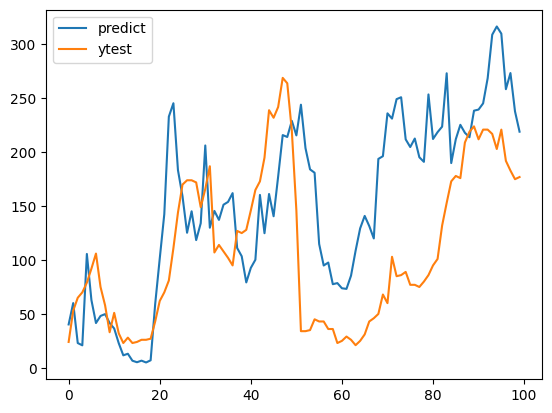

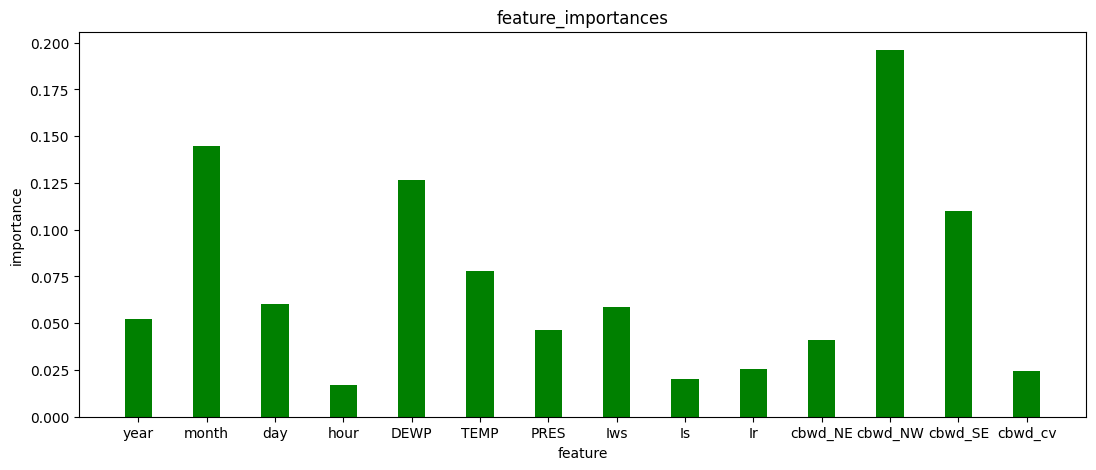

In [5]:
#xgb1
ytrain=train["pm2.5"]
xtrain=train[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv']]
ytest=test["pm2.5"]
xtest=test[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv']]
model_xgb1 = xgbr(max_depth=8, learning_rate=0.1, n_estimators=200, silent=True)
model_xgb1.fit(xtrain,ytrain)
print("score:",model_xgb1.score(xtest,ytest))
print("mae:",mean_absolute_error(ytest ,model_xgb1.predict(xtest)))
print("mse:",mean_squared_error(ytest ,model_xgb1.predict(xtest)))
print("r2:",r2_score(ytest ,model_xgb1.predict(xtest)))
print("ymean:",ytest.mean())
"""
for i in range(10,200,10):
    model = xgbr(max_depth=8, learning_rate=0.1, n_estimators=i, silent=True, objective='reg:gamma')
    model.fit(xtrain,ytrain)
    mean_squared_error(ytest ,model.predict(xtest))
"""
pyplot.plot(model_xgb1.predict(xtest)[:100], label='predict')
pyplot.plot(np.array(ytest)[:100], label='ytest')
pyplot.legend()
pyplot.show()


x=xtrain.columns
y=model_xgb1.feature_importances_
fig = plt.figure(figsize=(13,5))
plt.bar(x,y,0.4,color="green")
plt.xlabel("feature")
plt.ylabel("importance")
plt.title("feature_importances")
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:13:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


score: 0.9450595475804282
mae: 12.0991505503042
mse: 480.82459468948815
r2: 0.9450595475804282
ymean: 97.78000934142923


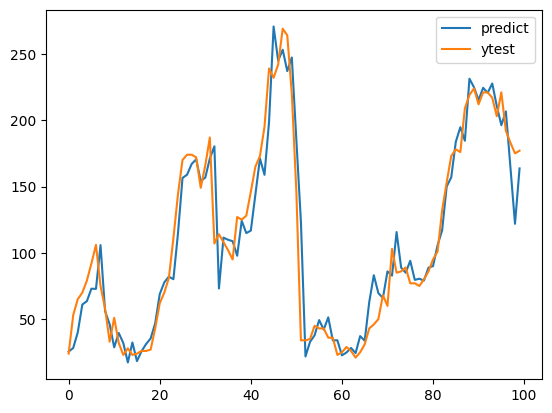

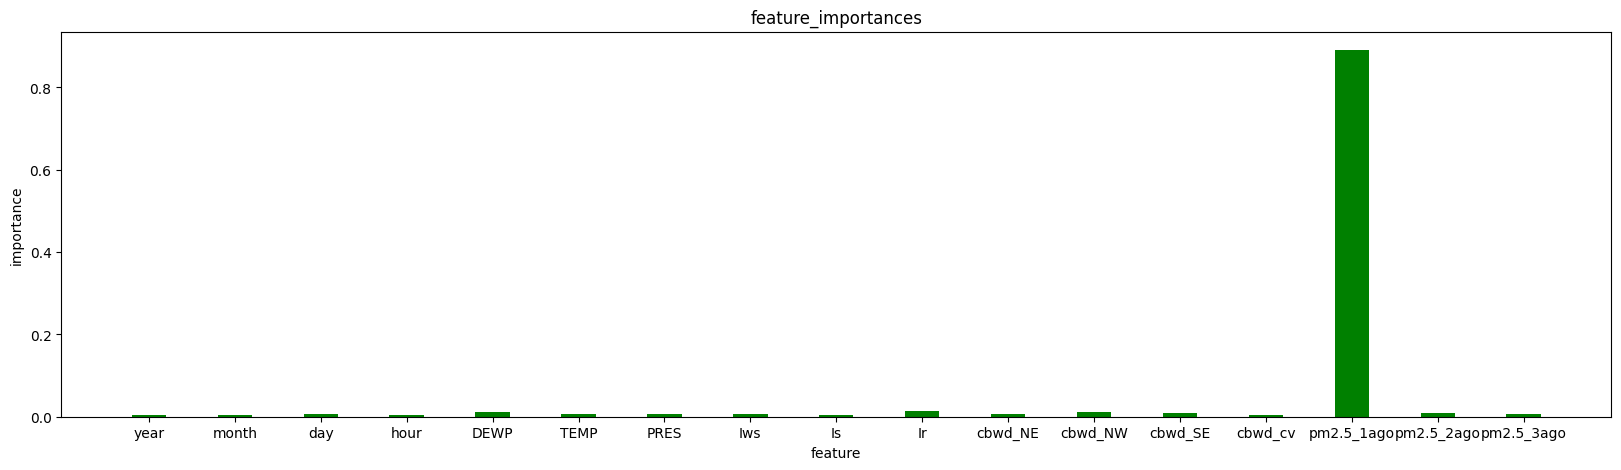

In [6]:
#xgb2
ytrain=train["pm2.5"]
xtrain=train[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv',"pm2.5_1ago","pm2.5_2ago","pm2.5_3ago"]]
ytest=test["pm2.5"]
xtest=test[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv',"pm2.5_1ago","pm2.5_2ago","pm2.5_3ago"]]
model_xgb2 = xgbr(max_depth=8, learning_rate=0.1, n_estimators=200, silent=True)
model_xgb2.fit(xtrain,ytrain)
print("score:",model_xgb2.score(xtest,ytest))
print("mae:",mean_absolute_error(ytest ,model_xgb2.predict(xtest)))
print("mse:",mean_squared_error(ytest ,model_xgb2.predict(xtest)))
print("r2:",r2_score(ytest ,model_xgb2.predict(xtest)))
print("ymean:",ytest.mean())
pyplot.plot(model_xgb2.predict(xtest)[:100], label='predict')
pyplot.plot(np.array(ytest)[:100], label='ytest')
pyplot.legend()
pyplot.show()


x=xtrain.columns
y=model_xgb2.feature_importances_
fig = plt.figure(figsize=(20,5))
plt.bar(x,y,0.4,color="green")
plt.xlabel("feature")
plt.ylabel("importance")
plt.title("feature_importances")
plt.show()

In [7]:
#lstm
import tensorflow as tf

lstm_xtrain=np.array(xtrain)
lstm_xtest=np.array(xtest)
lstm_xtrain = lstm_xtrain.reshape((lstm_xtrain.shape[0],1,lstm_xtrain.shape[1]))
lstm_xtest =  lstm_xtest.reshape((lstm_xtest.shape[0],1,lstm_xtest.shape[1]))



lstm_xtrain = tf.convert_to_tensor(lstm_xtrain)
lstm_ytrain = tf.convert_to_tensor(lstm_ytrain)
lstm_xtest = tf.convert_to_tensor(lstm_xtest)
lstm_ytest = tf.convert_to_tensor(lstm_ytest)

# design network
model = Sequential()
model.add(LSTM(units=50,
                   input_shape=(lstm_xtrain.shape[1],lstm_xtrain.shape[2]),
                   activation='relu',
                   return_sequences=False))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(lstm_xtrain, lstm_ytrain, epochs=50, batch_size=72, validation_data=(lstm_xtest, lstm_ytest), verbose=2, shuffle=False)
# plot history
predict_result = model.predict(lstm_xtest)
print("mae:",mean_absolute_error(ytest ,predict_result))
print("mse:",mean_squared_error(ytest ,predict_result))
print("r2:",r2_score(ytest ,predict_result))

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

pyplot.plot(model.predict(lstm_xtest)[:100], label='predict')
pyplot.plot(np.array(lstm_ytest)[:100], label='ytest')
pyplot.legend()
pyplot.show()
"""
lstm超参数
activation='relu'
loss='mae'
optimizer='adam'
epochs=50
batch_size=72
validation_data=(xtest, ytest)
shuffle=False
"""


NameError: name 'lstm_ytrain' is not defined

In [ ]:
#knn

#from sklearn.model_selection import train_test_split,cross_val_score,mean_absolute_error

ytrain=train["pm2.5"]
xtrain=train[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv']]
ytest=test["pm2.5"]
xtest=test[['year', 'month','day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv']]
k=50
knn=knr(k)
knn.fit(xtrain,ytrain)
knn.score(xtest,ytest)

pyplot.plot(knn.predict(xtest)[:100], label='predict')
pyplot.plot(np.array(ytest)[:100], label='ytest')
pyplot.legend()
pyplot.show()

In [ ]:
model_svr = SVR()

model_svr.fit(xtrain,ytrain)
pyplot.plot(model_svr.predict(xtest)[:100], label='predict')
pyplot.plot(np.array(ytest)[:100], label='ytest')
pyplot.legend()
pyplot.show()
